# CM07 - Lineaire regressie - oefening 2

In deze oefening gaan we onderzoeken of het verbruik van auto's is te voorspellen aan de hand van diverse kenmerken. Er worden eerst een aantal analyses en bewerkingen op de data uitgevoerd, voordat we starten met enkele opdrachten.

In [4]:
# Bronnen
# Dowload: https://archive.ics.uci.edu/ml/datasets/Auto+MPG 
# Omvormen naar csv: http://fatihsarigoz.com/autompg-data.html 
# Lineaire regressie: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/ 

In [5]:
# Libraries importeren

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt

In [6]:
# Analyseren welke attributen er in de dataset zitten. Als je de inhoud niet snapt, is het handig om ff te Googlen!

df = pd.read_csv('lineaire_regressie_auto_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
# Inhoud van de attributen analyseren, check wat describe() doet met het attribuut `origin`

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# Drop name: die hebben we niet nodig 

df = df.drop('name', axis=1)

In [9]:
# Origin lijkt een numerieke waarde, maar het is een categorie. 
# Dit attribuut moeten we aanpassen voordat we het kunnen gebruiken voor lineaire regressie

df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin_1       -0.565161
origin_2        0.244313
origin_3        0.451454
Name: mpg, dtype: float64


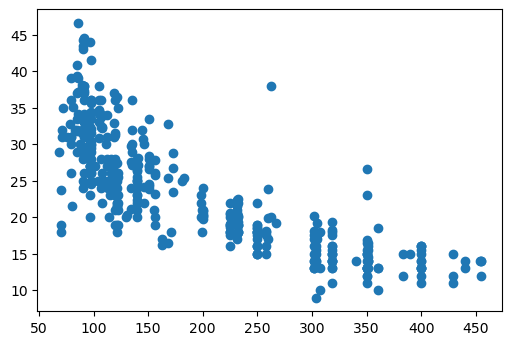

In [11]:
# Verkenning van de correlaties

print(df.corr()['mpg'])

plt.subplots(dpi=100)
plt.scatter(df.displacement, df.mpg)
plt.show()

### 1. Kies het juiste modeltype

In [1]:
# Lineaire regressie


### 2. Kies de hyperparameters

### 3. Organiseer de data: _features_ (eigenschappen) en _target_ (resultaat)

In [30]:
X = df.drop('mpg',axis=1) #df wordt hier niet aangepast
y = df['mpg']


### 4. Creëer een training- en validatieset

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0)

### 5. Start het leerproces

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y1 = lr.intercept_+lr.coef_[0]*x
print('a = {:.0f}, b = {:.0f}'.format(lr.intercept_, lr.coef_[0]))


a = -15, b = -0


### 6. Valideer het model

Bereken de determinatiecoëfficient $r^2$.

In [37]:
lr.score(X_test,y_test)

0.8237889838877073

In [38]:
predmpg = lr.predict(X_test)
r2_score(y_test,predmpg)

0.8237889838877073

Bereken de *root mean squared error*, gebruik makend van `mean_squared_error()`.

In [40]:
np.sqrt(mean_squared_error(y_test,predmpg))

3.2377283837386472

Wat is de betekenis van dit getal?

Wat gebeurt er met de lineaire regressie als je andere _features_ kiest? Welke deelverzameling van kenmerken is het beste?


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e9b27b8-a34d-4e11-8ef1-1fdc6f91d699' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>